# Challenge 4: Nested dictionaries

Next week we will deal with web scraping and API's. Python wise this means since we will encounter file formats like JSON we will have to deal with a lot of dictionaries. Not only ordinary dictionaries, but also nested ones. In this lab we will train handling them.

In the following, if we show values with markdown, just copy-paste them into your `# my code here` field if you need them.

**Warm up phase: Here are some keys and values. Use them to build a dictionary called `numbers_dct`**

```python
keys = ['hundred', 'twohundred', 'threehundred']
values = [10, 20, 30]
```

In [1]:
# your code here
keys = ['hundred', 'twohundred', 'threehundred']
values = [10, 20, 30]
numbers_dct = {'hundred' : 10, 'twohundred' : 20, 'threehundred' :30}
numbers_dct

{'hundred': 10, 'twohundred': 20, 'threehundred': 30}

In [2]:
numbers_dct = {keys[i]:values[i] for i, _ in enumerate(keys)}

**Here are two dictionaries. Merge their entries to a third dictionary**

```python
dict1 = {'One': 1, 'Two': 2, 'Six': 6}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}
```

In [3]:
dict1 = {'One': 1, 'Two': 2, 'Six': 6}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}

In [20]:
dict3= {**dict1,**dict2}
dict3

{'One': 1, 'Two': 2, 'Six': 6, 'Thirty': 30, 'Fourty': 40, 'Fifty': 50}

In [21]:
# your code here
dict4 = dict1.update(dict2)
dict4

In [24]:
dict4 = {}
for d in [dict1, dict2]:
  dict4.update(d)

In [25]:
print(dict4)

{'One': 1, 'Two': 2, 'Six': 6, 'Thirty': 30, 'Fourty': 40, 'Fifty': 50}


**Nested dictionaries**

Here comes a bigger, nested dictionary. Store Martin's French grades in a variable called `martins_french` by navigating to the value using keys and values. Remember, while you drill down the structure of the dictionary and you encounter a new dictionary, you can always use `.keys()` and `.values()` to not loose orientation.

In [6]:
sampleDict = {
    "class":{
        "student_list":{
            "Anna":{
                "marks":{
                    "physics":[70, 20, 100, 20],
                    "history":[80,10,55,35],
                    "math":[100, 90, 70, 35],
                }
            },
            "Martin":{
                "marks":{
                    "french":[20, 10, 35, 45],
                    "spanish":[40, 75, 50, 90],
                    "math": [90,85, 90, 95],
                }
            },
            "Richard":{
                "marks":{
                    "physics":[10, 10, 0, 90],
                    "biology":[50, 50, 70, 75],
                    "math":[90, 70, 50, 40],
                }
            }
        }
    }
}

In [26]:
# your code here
martins_french = {}
martins_french = sampleDict['class']['student_list']['Martin']['marks']['french']
martins_french

[20, 10, 35, 45]

**Calculate the mean of Richard's biology's grades**

In [27]:
# your code here
import statistics
statistics.mean(sampleDict['class']['student_list']['Richard']['marks']['biology'])

61.25

**Return a list of all the students**

In [28]:
# your code here
list(sampleDict['class']['student_list'])

['Anna', 'Martin', 'Richard']

**Return Anna's 2nd grade in history**

In [30]:
sampleDict['class']['student_list']['Anna']['marks']['history'][1]

10

**Return all the grades that are 3rd in the list for every subject for all the students**

Use appropriate `for` loops and a `print()` statement

In [31]:
# your code here
for i in sampleDict.get('class').get('student_list').keys():
    for m in sampleDict.get('class').get('student_list').get(i).keys():
        for n in sampleDict.get('class').get('student_list').get(i).get(m).values():
            print(n[2])

100
55
70
35
50
90
0
70
50


**Get all the grades and store them in a list `all_grades` Calculate the mean (solution: 55.97)**

You can of course use a modified version of your solution of the previous question.

In [32]:
# your code here
all_grades = []

# your code here
for student in sampleDict['class']['student_list']:
    for marks in sampleDict['class']['student_list'][student].values():
        for subject_values in marks.values():
            for grades in subject_values:
                all_grades.append(grades)

In [36]:
import numpy as np
np.mean(all_grades)

55.97222222222222

**Save that list as a column in a pandas dataframe and plot a histogram with it**

In [38]:
# your code here
import pandas as pd
df = pd.DataFrame({'A':all_grades})

Output should look like this

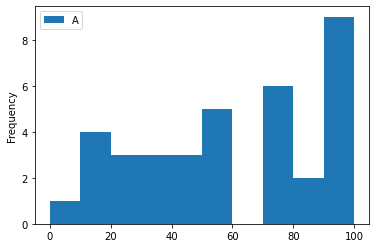

In [43]:
df.plot(kind='hist');

**Return all the students subjects. Watch out: We don't want repetitions!**

In [46]:
# your code
all_subjects = []

# your code here
for student in sampleDict['class']['student_list']:
    for marks in sampleDict['class']['student_list'][student].values():
        for subject in marks.keys():
            all_subjects.append(subject)
all_subjects

['physics',
 'history',
 'math',
 'french',
 'spanish',
 'math',
 'physics',
 'biology',
 'math']

Output should look like this

**Richard heard you're a data enthusiast and asks you to hack the school server and and replace his worst physics grade rounded to full integers (0) with the mean of his physics grades (he doesn't want to raise suspicion). Help him do that. Check wether your hack was successful by printing his physics grade**

In [48]:
# your code here
grades = sampleDict['class']['student_list']['Richard']['marks']['physics']

print(grades)

mingrade = min(grades)
newgrade = int(sum(grades)/len(grades))

for count, value in enumerate(grades):
    if value == mingrade:
        sampleDict['class']['student_list']['Richard']['marks']['physics'][count] = newgrade
        
print(sampleDict['class']['student_list']['Richard']['marks']['physics'])

[10, 10, 36, 90]
[36, 36, 36, 90]


**The hack was discovered! They found out it must have been Richard because his physics grade is not a multiple of 5 like all the other grades**

Expell Richard (poor Richard!) by removing him from the dictionary. Use `del`. And print the resulting class dictionary.

In [15]:
# your code here
